---
# Disposible Income Difference in Denmark
**Christian Lyng (TQS500) & Lasse Trap-Hinge (QJW189)**

In this data project, we seek to investigate the development of disposable income in Denmark over time. Moreover, we will investigate whether the disposable income differs by region and sex over time. For convenience of the reader, disposable income will be reffered to as income for the remainder of the analysis. 

*Note that the python file in the dataproject folder contains fully documented code*

## Part 1: Disposable Income Difference by Region

We approach this problem by starting with importing data from Statistics Denmark, more specifically from table INDKFPP3. 

In [21]:
#Import relevant packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
import pydst
%matplotlib inline 

#Define the language of DST used when collecting data
Dst = pydst.Dst(lang = 'da')

#Create a dictionary of columns to translate variables from DST to english
columns_dict = {}
columns_dict['REGION'] = 'Region'
columns_dict['ENHED'] = 'Unit'
columns_dict['KOEN'] = 'Sex'
columns_dict['INDKINTB'] = 'Income Interval'
columns_dict['TID'] = 'Year'
columns_dict['INDHOLD'] = 'Income'

#Collect data from DST using the pydst package
df = Dst.get_data(table_id = 'INDKFPP3', variables={'REGION':['*'],'ENHED':['118'], 'KOEN':['MOK'], 'INDKINTB':['000'], 'TID':['*']})

#Clean and structure data utilizing pandas functions
df.rename(columns = columns_dict, inplace = True)  
df.drop(columns = ['Unit', 'Sex', 'Income Interval'], inplace = True)  
df['Region'] = df['Region'].replace({'Hele landet':'Denmark'})  
df = df.pivot(index = 'Region', columns = 'Year', values = 'Income')    
df = df.reindex(['Region Hovedstaden', 'Region Midtjylland', 'Region Nordjylland', 'Region Sjælland', 'Region Syddanmark', 'Denmark'], axis = 0)

As we seek to investigate the development in income by region over time, we create an interactive bar chart. Moreover, we implement the average income in Denmark called "Denmark" which can be used as a reference for each region.

In [22]:
#Define a function to create a bar plot of the disposable by region and year
def income_figure_1(df, year):
    df[[year]].plot(kind = 'bar', color = '#193264', figsize = (8,5)) 
    plt.xticks(rotation = 45, horizontalalignment= 'right')
    plt.title('Disposible Income by region, 2016 prices', loc = 'left') 
    plt.ylabel('DKK')   
    plt.xlabel('') 
    plt.ylim(100000, 300000)    
    plt.show()
    
#Make the bar chart interactive by implementing ipywidgets
def income_history_1(df):
    widgets.interact(income_figure_1, 
    df = widgets.fixed(df),
    year = widgets.IntSlider(description = 'Year', min = 1987, max = 2017, value = 1987)    
    )              
income_history_1(df)

interactive(children=(IntSlider(value=1987, description='Year', max=2017, min=1987), Output()), _dom_classes=(…

There is a substantial increase in the income overall. As we are considering 2016 prices, the interactive bar chart reflect real income increases. Region Hovedstaden consistently lies above the average and has the highest average income in Denmark of the five regions while Region Nordjylland has the lowest average disposable income throughout the period. The financial crisis in 2007/2008 is noticeable where a large decrease in income is observed.

*Note that the y-axis is set to start at 100,000 to enhance the changes in disposable income*.

To further extend the analysis, we will consider another interactive bar chart but now with the y-axis fixed to the average income of Denmark. This visualization allow us to investigate how the income difference by region has changed throughout time compared to the average. 

In [23]:
#Create a new bar chart where the y-axis is fixed to 'Denmark'
def income_figure_2(df, year):
    df[[year]].plot(kind = 'bar', color = '#193264' , figsize = (8,5))  
    plt.xticks(rotation = 45, horizontalalignment = 'right') 
    plt.title('Disposible Income by region, 2016 prices', loc = 'left') 
    plt.ylabel('DKK')   
    plt.xlabel('')  
    plt.ylim(0, df.loc['Denmark',year] * 2) 
    plt.show()

#Make the bar chart interactive
def income_history_2(df):
    widgets.interact(income_figure_2, 
    df = widgets.fixed(df),
    year = widgets.IntSlider(description = 'Year', min = 1987, max = 2017, value = 1987)                 
    )  
income_history_2(df)

interactive(children=(IntSlider(value=1987, description='Year', max=2017, min=1987), Output()), _dom_classes=(…

The distribution of income difference does not change much throughout the period. However, it is evident that Region Hovedstaden has the highest average income and Region Nordjylland the lowest. A different dataset might be able to better utilize the idea behind this interactive bar chart with a bar fixed on the y-axis. 


## Part 2: Disposable Income Difference by Sex

To analyse the income difference between men and women, more specifically income growth, from 1987 to 2017, we import data from Statistics Denmark.

In [24]:
#Import data from DST
df_mw = Dst.get_data(table_id = 'INDKFPP3', variables = {'REGION':['000'],'ENHED':['118'], 'KOEN':['M', 'K'], 'INDKINTB':['000'], 'TID':['*']})

#Clean and structure data utilizing pandas functions
df_mw.rename(columns = columns_dict, inplace = True) 
df_mw.drop(columns = ['Unit', 'Region', 'Income Interval'], inplace = True) 
df_mw['Sex'] = df_mw['Sex'].replace({'Mænd':'Men', 'Kvinder':'Women'})  
df_mw = df_mw.pivot(index = 'Year', columns = 'Sex', values = 'Income') 

We compare growth in income for men and women by creating an index column for each where 1987 is set to 100.

In [25]:
#Create an index (1987 = 100) column for men and women
df_mw['Index_Men'] = (df_mw['Men']/df_mw.iloc[0,0]) * 100 
df_mw['Index_Women'] = (df_mw['Women']/df_mw.iloc[0,1]) * 100 

To illustrate the developed in income growth for men and women throughout the period, we plot the development.

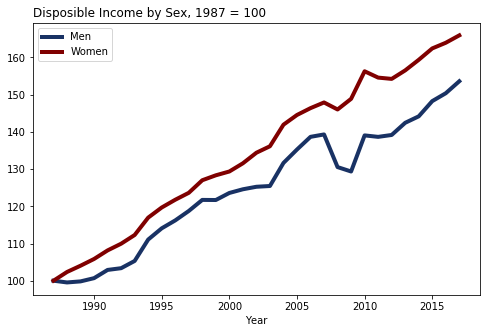

In [26]:
#Create a figure illustrating the development of disposable income over time for men and women
df_mw['Index_Men'].plot(color = '#193264', linewidth = 4, label = 'Men', figsize = (8,5))                                                
df_mw['Index_Women'].plot(color = '#800000', linewidth = 4, label = 'Women') 
plt.title('Disposible Income by Sex, 1987 = 100', loc = 'left') 
plt.legend()
plt.show()

Both disposable income for men and women have grown significantly from 1987 to 2017. Overall, women have had higher growth compared to men. The disposable income for women have grown by more than 60% from 1987 to 2017 while men's disposable income have grown by 50 % in the same period. The disposable income for both men and women generally have had positive growth rates throughout the period. Men's disposable income have been hit harder by recessions as the growth have decreased relatively more compared to women's growth in income. This is espicially seen by the financial crisis that started in 2007. This could mean that men works in professions which are more sensitive to economic cycles.

---